In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
# Importing the dataset
df = pd.read_csv("placement.csv")
df.drop('sl_no', axis = 1, inplace = True)  #sl_no is same as index.
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Basic statistics and information about data
print("No.of datapoints in dataset: ", len(df))
print("No. of columns in dataset: ", len(df.columns))

No.of datapoints in dataset:  215
No. of columns in dataset:  14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


- There are 8 columns with categorical data. 
- We see that there are some of NULL values in salary, due to the fact that some students who have not been placed.

In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Basic EDA
__Feature: gender__

No. of Male students in the dataset: 139 ( 64.65116279069767 %)
No. of Female students in the dataset: 76 ( 35.348837209302324 %)


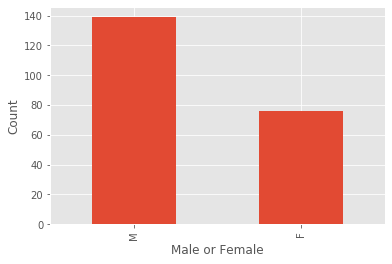

In [6]:
m_vs_f = df['gender'].value_counts()
plt.style.use('ggplot')
m_vs_f.plot(kind="bar")
plt.xlabel("Male or Female")
plt.ylabel("Count")

print("No. of Male students in the dataset:", m_vs_f[0], "(", m_vs_f[0]*100/(m_vs_f[0]+m_vs_f[1]), "%)")
print("No. of Female students in the dataset:", m_vs_f[1], "(", m_vs_f[1]*100/(m_vs_f[0]+m_vs_f[1]), "%)")

plt.show()

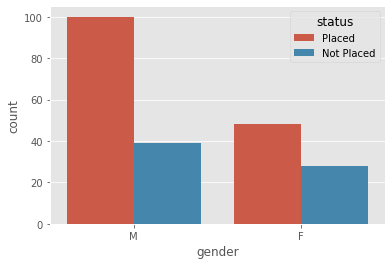

In [7]:
# gender vs salary
sns.countplot("gender", hue="status", data=df)

plt.show()

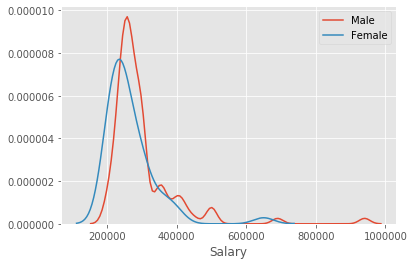

In [8]:
sns.kdeplot(df['salary'][df['gender']=="M"])
sns.kdeplot(df['salary'][df['gender']=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary")
plt.show()

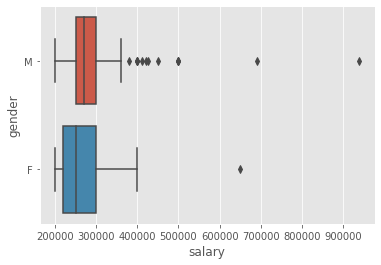

In [9]:
sns.boxplot("salary", "gender", data=df)
plt.show()

Observations:
- Male students have comparatively higher placements.
- Male students tend to recieve higher salaries than female students.

__feature = ssc_p__

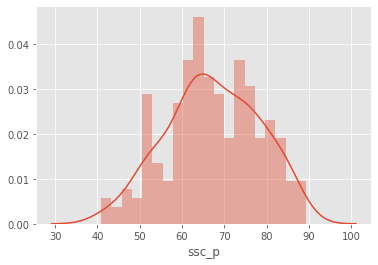

In [10]:
sns.distplot(df["ssc_p"], hist=True, kde=True, bins=20)

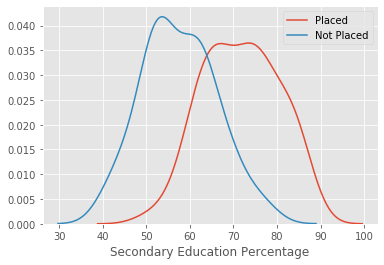

In [11]:
sns.kdeplot(df['ssc_p'][df['status']=="Placed"])
sns.kdeplot(df['ssc_p'][df['status']=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

Observations:
- Most students have marks between 60-70%
- Students who have percentage higher than 90 got placed.
- Students with percentage less than 50 percentage have a very low chance of getting placed.

__feature: ssc_b__

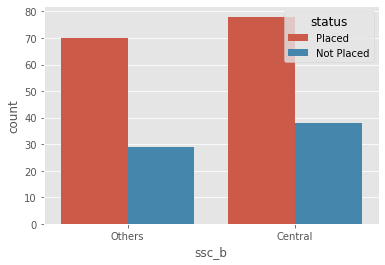

In [12]:
# ssc_board vs salary
sns.countplot("ssc_b", hue="status", data=df)

plt.show()

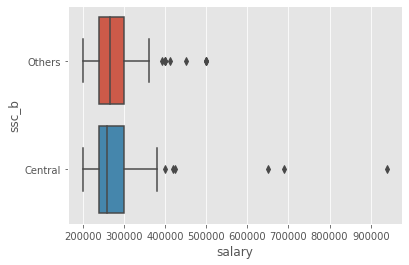

In [13]:
sns.boxplot("salary", "ssc_b", data=df)
plt.show()

Observations:
- Board in SSC doesn't seem to affect a student's chances of getting placed.
- Few students from Central board got higher salaries than others. 

__feature: hsc_p__

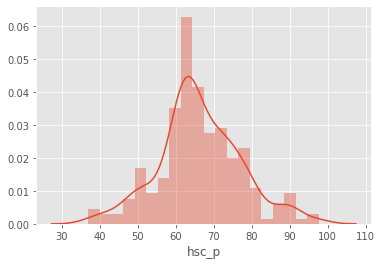

In [14]:
sns.distplot(df["hsc_p"], hist=True, kde=True, bins=20)

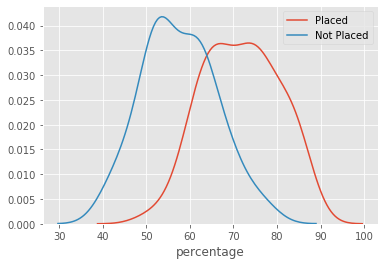

In [15]:
sns.kdeplot(df['ssc_p'][df['status']=='Placed'])
sns.kdeplot(df['ssc_p'][df['status']=='Not Placed'])
plt.xlabel("percentage")
plt.legend(['Placed', 'Not Placed'])
plt.show()

Observations:
- All students with Secondary Education Percentage above 90% are placed
- All students with Secondary Education Percentage below 50% are not-placed
- Students with good Secondary Education Percentage are placed on average.

__feature: hsc_b__

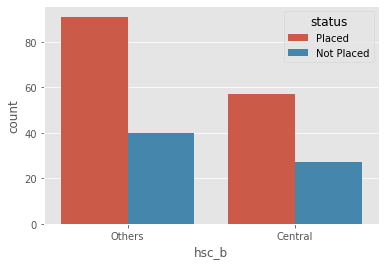

In [16]:
# hsc_board vs salary
sns.countplot("hsc_b", hue="status", data=df)

plt.show()

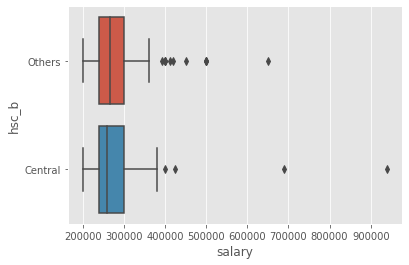

In [17]:
sns.boxplot('salary', 'hsc_b', data=df)

Observations:
- It doesn't affect the placement chances of a student much.
- Being from Central board doesn't ensure high salaries.

__feature: hsc_s__

[]

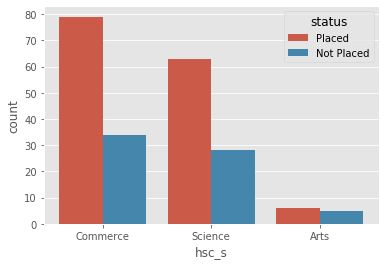

In [18]:
sns.countplot('hsc_s', hue='status', data=df)
plt.plot()

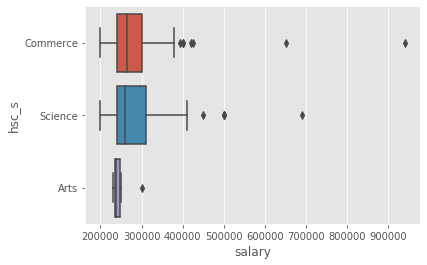

In [19]:
sns.boxplot('salary', 'hsc_s', data=df)

Observations:
- Very few students choose to opt for Arts.
- Around 60 percentage of students get placed in Commerce and Science fields.
- Average salary of Commerce students is higher than Science and Arts.
- Not much can be said about salaries of Arts students as no. of students are very less. We can however see from the plot that they do not get high salaries.

__feature = degree_p__

[]

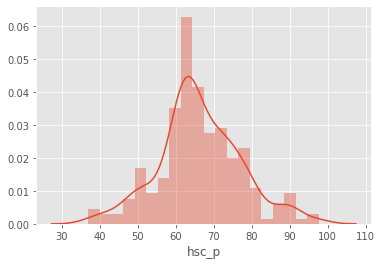

In [20]:
sns.distplot(df["hsc_p"], hist=True, kde=True, bins=20)
plt.plot()

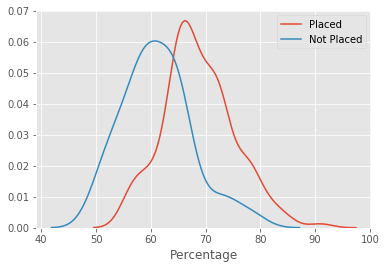

In [21]:
sns.kdeplot(df['degree_p'][ df['status']=="Placed"])
sns.kdeplot(df['degree_p'][ df['status']=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Percentage")
plt.show()

Observations:
- Undergraduate percentage lower than 50% have a very chance of getting a job.
- Undergrads with percentage higher than 65% have a high chance of being placed.

__feature: degree_t__

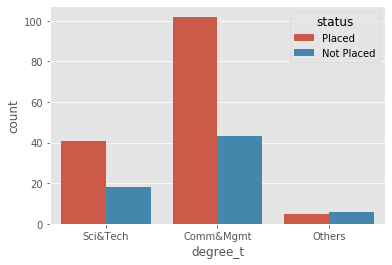

In [22]:
sns.countplot("degree_t", hue="status", data=df)
plt.show()

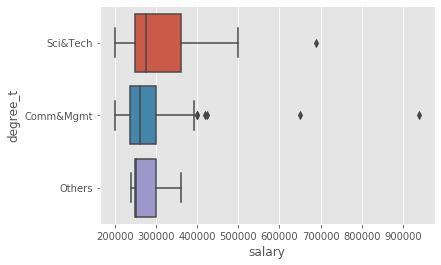

In [23]:
sns.boxplot("salary", "degree_t", data=df)
plt.show()

Observations:
- Science&Tech and Commerce&Mgmt students are getting higher salaries.
- Few Commerce&Mgmt students get very high salaries.

__feature: workex__

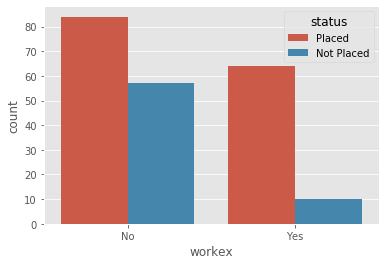

In [24]:
sns.countplot("workex", hue="status", data=df)
plt.show()

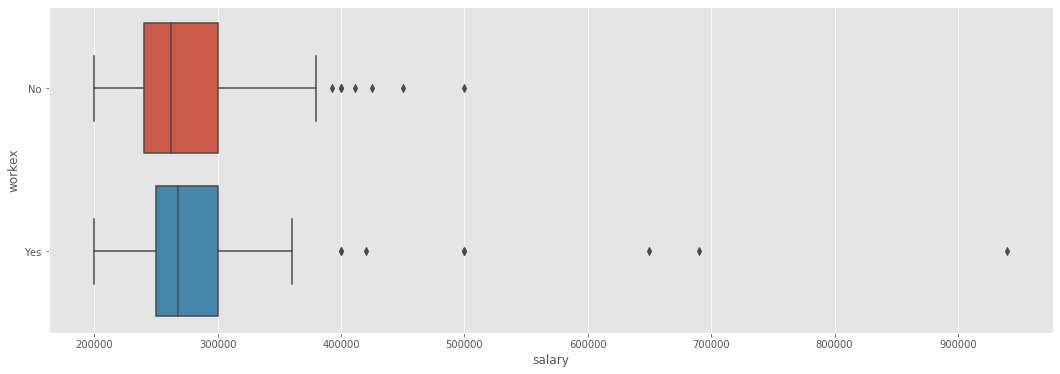

In [25]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=df)
plt.show()

Observations:
- Students with prior work-experince have a high chance of getting placed.
- Very few students with work-experience didn't get placed.
- Students with work-experience tend to get higher salaries. Avg. and Base salaries are also high.

__feature: etest_p__

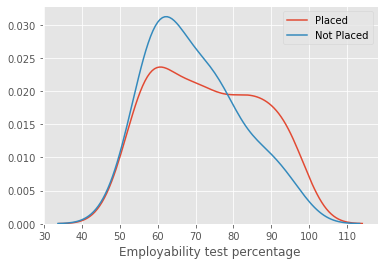

In [26]:
sns.kdeplot(df['etest_p'][df['status']=="Placed"])
sns.kdeplot(df['etest_p'][df['status']=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

[]

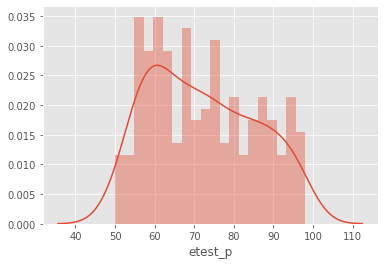

In [27]:
sns.distplot(df['etest_p'], bins=20)
plt.plot()

Observations:
- This feature doesn't seem to be a deciding factor.

__feature: specialisation__

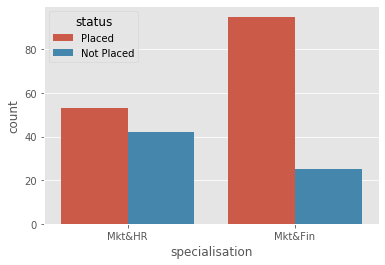

In [28]:
sns.countplot("specialisation", hue="status", data=df)
plt.show()

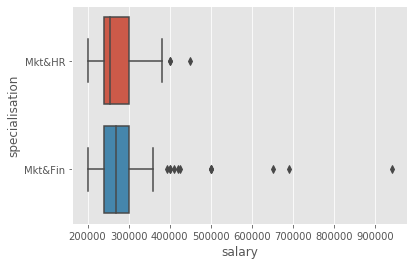

In [29]:
sns.boxplot("salary", "specialisation", data=df)
plt.show()

Observations:
- Very high no. of students with specialisation in Mkt&Fin have been placed.
- Students in have very high salaries. 

__feature: mba_p__


[]

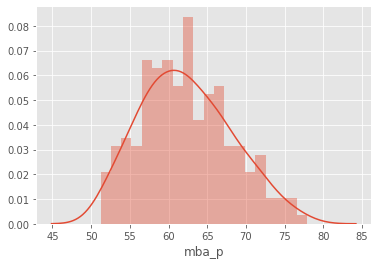

In [30]:
sns.distplot(df['mba_p'], bins=20)
plt.plot()

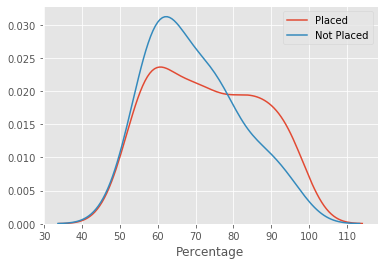

In [31]:
sns.kdeplot(df['etest_p'][df['status']=="Placed"])
sns.kdeplot(df['etest_p'][df['status']=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Percentage")
plt.show()

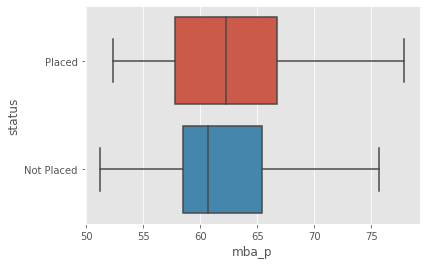

In [32]:
sns.boxplot("mba_p", "status", data=df)
plt.show()

Observations:
- Doesn't seem to affect salaries much.
- Students with higher percentage in MBA have a higher chance of getting placed.

## Converting categorical data to numeric data

In [33]:
# Printing all categorical variables
for i in df.columns:
    if df[i].dtype == object:
        print(i)

gender
ssc_b
hsc_b
hsc_s
degree_t
workex
specialisation
status


In [34]:
def le(data):
    for i in data.columns:
        if data[i].dtype == object:
            label_encoder = LabelEncoder()
            data[i] = label_encoder.fit_transform(data[i])

In [35]:
X = df.drop(['status', 'salary'], axis = 1)
y = df['status']
le(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [36]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [37]:
y[:5]

array([1, 1, 1, 0, 1])

## Train Test Split

In [38]:
#Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 45)

## Models
(Without feature extraction and feature selection)
#### 1. Logistic Regression 

In [39]:
# hyper-parameter tuning
alpha = [10 ** x for x in range(-6, 1)]
scores = []
for i in alpha:
    print("For alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=45)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)

# best accuracy score
best_alpha = np.argmax(scores)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=45)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of alpha =", alpha[best_alpha], ",best accuracy score =", best_accuracy_score)

For alpha = 1e-06
Accuracy score = 0.7384615384615385
For alpha = 1e-05
Accuracy score = 0.7384615384615385
For alpha = 0.0001
Accuracy score = 0.8615384615384616
For alpha = 0.001
Accuracy score = 0.8461538461538461
For alpha = 0.01
Accuracy score = 0.8769230769230769
For alpha = 0.1
Accuracy score = 0.7692307692307693
For alpha = 1
Accuracy score = 0.7692307692307693
--------------------------------------------------
For best value of alpha = 0.01 ,best accuracy score = 0.8769230769230769


#### 2. Linear SVM

In [40]:
# hyper-parameter tuning
alpha = [10 ** x for x in range(-6, 1)]
scores = []
for i in alpha:
    print("For alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=45)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)

# best accuracy score
best_alpha = np.argmax(scores)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=45)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of alpha =", alpha[best_alpha], ",best accuracy score =", best_accuracy_score)

For alpha = 1e-06
Accuracy score = 0.8153846153846154
For alpha = 1e-05
Accuracy score = 0.8461538461538461
For alpha = 0.0001
Accuracy score = 0.8769230769230769
For alpha = 0.001
Accuracy score = 0.8615384615384616
For alpha = 0.01
Accuracy score = 0.8615384615384616
For alpha = 0.1
Accuracy score = 0.7692307692307693
For alpha = 1
Accuracy score = 0.7692307692307693
--------------------------------------------------
For best value of alpha = 0.0001 ,best accuracy score = 0.8769230769230769


#### 3. K-Nearest Neighbors

In [41]:
n = [1,3,5,7,9,11,13,15,17,19]
scores = []
for i in n:
    print("for n_neighbors =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)
    
best_n = np.argmax(scores)
clf = KNeighborsClassifier(n_neighbors=n[best_n])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_acc_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of n =", n[best_n], ",best accuracy score =", best_acc_score)

for n_neighbors = 1
Accuracy score = 0.676923076923077
for n_neighbors = 3
Accuracy score = 0.8
for n_neighbors = 5
Accuracy score = 0.7076923076923077
for n_neighbors = 7
Accuracy score = 0.7384615384615385
for n_neighbors = 9
Accuracy score = 0.7538461538461538
for n_neighbors = 11
Accuracy score = 0.7846153846153846
for n_neighbors = 13
Accuracy score = 0.7846153846153846
for n_neighbors = 15
Accuracy score = 0.8153846153846154
for n_neighbors = 17
Accuracy score = 0.8
for n_neighbors = 19
Accuracy score = 0.8
--------------------------------------------------
For best value of n = 15 ,best accuracy score = 0.8153846153846154


#### 4. Random Forest Classifier

In [42]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
scores = []
for i in alpha:
    print("*"*50)
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        print("Accuracy score =", score)
        
best_hp = np.argmax(scores)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2) -1], criterion='gini', max_depth=max_depth[int(best_alpha%2) -1 ], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print('For values of best estimator = ', alpha[int(best_alpha/2) -1], "accuracy score =", best_accuracy_score)


**************************************************
for n_estimators = 100 and max depth =  5
Accuracy score = 0.8923076923076924
for n_estimators = 100 and max depth =  10
Accuracy score = 0.8769230769230769
**************************************************
for n_estimators = 200 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 200 and max depth =  10
Accuracy score = 0.8769230769230769
**************************************************
for n_estimators = 500 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 500 and max depth =  10
Accuracy score = 0.8769230769230769
**************************************************
for n_estimators = 1000 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 1000 and max depth =  10
Accuracy score = 0.8923076923076924
**************************************************
for n_estimators = 2000 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 2000 and max dept

# Feature Extraction and Feature Selection

In [43]:
X_scaled.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.538240,1.0,0.889621,1.0,0.5,0.195122,1.0,0.0,0.104167,1.0,0.284483
1,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,1.0,0.760417,0.0,0.564843
2,1.0,0.497011,0.0,0.510708,0.0,0.0,0.341463,0.0,0.0,0.520833,0.0,0.247001
3,1.0,0.311482,0.0,0.247117,0.0,1.0,0.048780,1.0,0.0,0.333333,1.0,0.308096
4,1.0,0.925788,0.0,0.602965,0.0,0.5,0.568293,0.0,0.0,0.975000,0.0,0.160795


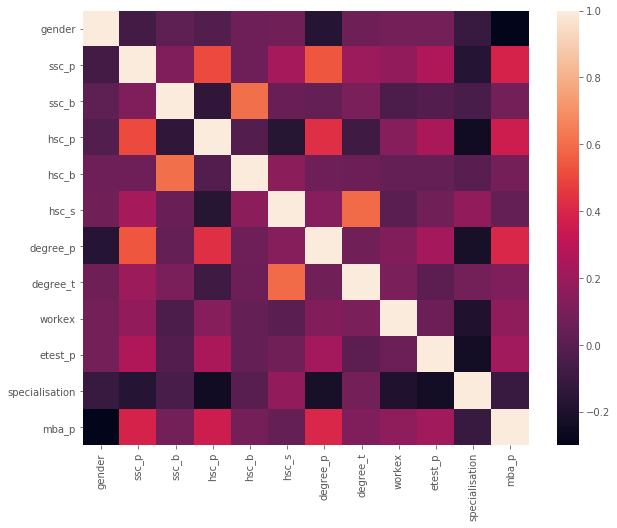

In [44]:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [45]:
# Feature extraction
# Sum of percentges of SSC, HSC, and MBA
X_train['sum_pct'] = X_train['ssc_p'] + X_train['hsc_p'] +X_train['mba_p']
X_test['sum_pct'] = X_test['ssc_p'] + X_test['hsc_p'] +X_test['mba_p']

# Absolute difference of SSC, HSC, and MBA percentages
X_train['diff_pct'] = abs(X_train['ssc_p'] - X_train['hsc_p'] - X_train['mba_p'])
X_test['diff_pct'] = abs(X_test['ssc_p'] - X_test['hsc_p'] - X_test['mba_p'])

# Avg percentage obtained in SSC, HSC, and MBA
X_train['avg_pct'] = (X_train['ssc_p'] + X_train['hsc_p'] + X_train['mba_p'])/3
X_test['avg_pct'] = (X_test['ssc_p'] - X_test['hsc_p'] - X_test['mba_p'])/3

In [46]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,sum_pct,diff_pct,avg_pct
187,1.0,0.775304,0.0,0.469522,0.0,1.0,0.414634,1.0,1.0,0.937500,0.0,0.511619,1.756445,0.205837,0.585482
72,1.0,0.906411,1.0,0.494234,1.0,1.0,0.682927,0.0,0.0,0.947917,0.0,0.649175,2.049820,0.236998,0.683273
79,0.0,0.579468,0.0,0.411862,0.0,1.0,0.390244,1.0,0.0,0.520833,1.0,0.628936,1.620265,0.461329,0.540088
73,1.0,0.488765,0.0,0.771499,1.0,0.5,0.529756,0.0,0.0,0.750000,0.0,0.320090,1.580354,0.602824,0.526785
58,1.0,0.682540,0.0,0.411862,1.0,1.0,0.439024,0.0,0.0,0.500000,0.0,0.254123,1.348524,0.016555,0.449508


In [47]:
# Scaling newly created features
X_train[['sum_pct', 'diff_pct', 'avg_pct']] = scaler.fit_transform(X_train[['sum_pct', 'diff_pct', 'avg_pct']])
X_test[['sum_pct', 'diff_pct', 'avg_pct']] = scaler.fit_transform(X_test[['sum_pct', 'diff_pct', 'avg_pct']])

#### 5. Logistic Regression with Feature Extraction and Feature Selection

In [48]:
# Feature selection
clf = SGDClassifier(alpha=0.01, penalty='l2', loss='log', random_state=45)
clf.fit(X_train, y_train)

#credits: https://medium.com/towards-artificial-intelligence/how-to-use-scikit-learn-eli5-library-to-compute-permutation-importance-9af131ece387
perm = PermutationImportance(clf, random_state = 45).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0523 ± 0.0417,hsc_p
0.0523 ± 0.0925,ssc_p
0.0462 ± 0.0195,degree_p
0.0277 ± 0.0359,mba_p
0.0246 ± 0.0417,workex
0.0215 ± 0.0417,degree_t
0.0185 ± 0.0230,ssc_b
0.0185 ± 0.0408,sum_pct
0.0062 ± 0.0151,etest_p
0.0031 ± 0.0301,specialisation


In [49]:
columns = ['hsc_p', 'ssc_p', 'degree_p', 'mba_p', 'workex', 'degree_t', 'ssc_b', 'sum_pct', 'etest_p', 'specialisation', 'gender']

In [50]:
X_train = X_train[columns]
X_test = X_test[columns]

In [51]:
# hyper-parameter tuning
alpha = [10 ** x for x in range(-6, 1)]
scores = []
for i in alpha:
    print("For alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=45)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)

# best accuracy score
best_alpha = np.argmax(scores)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=45)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of alpha =", alpha[best_alpha], ",best accuracy score =", best_accuracy_score)

For alpha = 1e-06
Accuracy score = 0.8615384615384616
For alpha = 1e-05
Accuracy score = 0.8615384615384616
For alpha = 0.0001
Accuracy score = 0.8153846153846154
For alpha = 0.001
Accuracy score = 0.8923076923076924
For alpha = 0.01
Accuracy score = 0.8769230769230769
For alpha = 0.1
Accuracy score = 0.8
For alpha = 1
Accuracy score = 0.7692307692307693
--------------------------------------------------
For best value of alpha = 0.001 ,best accuracy score = 0.8923076923076924


#### 6. Linear SVM with feature extraction and frature selection

In [52]:
# hyper-parameter tuning
alpha = [10 ** x for x in range(-6, 1)]
scores = []
for i in alpha:
    print("For alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=45)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)

# best accuracy score
best_alpha = np.argmax(scores)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=45)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of alpha =", alpha[best_alpha], ",best accuracy score =", best_accuracy_score)

For alpha = 1e-06
Accuracy score = 0.7692307692307693
For alpha = 1e-05
Accuracy score = 0.8769230769230769
For alpha = 0.0001
Accuracy score = 0.7538461538461538
For alpha = 0.001
Accuracy score = 0.8769230769230769
For alpha = 0.01
Accuracy score = 0.8923076923076924
For alpha = 0.1
Accuracy score = 0.8
For alpha = 1
Accuracy score = 0.7692307692307693
--------------------------------------------------
For best value of alpha = 0.01 ,best accuracy score = 0.8923076923076924


#### 7. K-Nearest Neighbors with feature extraction and feature selection

In [53]:
n = [1,3,5,7,9,11,13,15,17,19]
scores = []
for i in n:
    print("for n_neighbors =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("Accuracy score =", score)
    
best_n = np.argmax(scores)
clf = KNeighborsClassifier(n_neighbors=n[best_n])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_acc_score = accuracy_score(y_test, y_pred)
print("-"*50)
print("For best value of n =", n[best_n], ",best accuracy score =", best_acc_score)

for n_neighbors = 1
Accuracy score = 0.7230769230769231
for n_neighbors = 3
Accuracy score = 0.8153846153846154
for n_neighbors = 5
Accuracy score = 0.7230769230769231
for n_neighbors = 7
Accuracy score = 0.7538461538461538
for n_neighbors = 9
Accuracy score = 0.7692307692307693
for n_neighbors = 11
Accuracy score = 0.7692307692307693
for n_neighbors = 13
Accuracy score = 0.7846153846153846
for n_neighbors = 15
Accuracy score = 0.7846153846153846
for n_neighbors = 17
Accuracy score = 0.8
for n_neighbors = 19
Accuracy score = 0.8153846153846154
--------------------------------------------------
For best value of n = 3 ,best accuracy score = 0.8153846153846154


#### 8. RandomForest with feature extraction and feature selection

In [54]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
scores = []
for i in alpha:
    print("*"*50)
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        print("Accuracy score =", score)
        
best_hp = np.argmax(scores)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2) -1], criterion='gini', max_depth=max_depth[int(best_alpha%2) -1 ], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
best_accuracy_score = accuracy_score(y_test, y_pred)
print("-"*50)
print('For values of best estimator = ', alpha[int(best_alpha/2) -1], "accuracy score =", best_accuracy_score)


**************************************************
for n_estimators = 100 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 100 and max depth =  10
Accuracy score = 0.8769230769230769
**************************************************
for n_estimators = 200 and max depth =  5
Accuracy score = 0.8923076923076924
for n_estimators = 200 and max depth =  10
Accuracy score = 0.8923076923076924
**************************************************
for n_estimators = 500 and max depth =  5
Accuracy score = 0.8769230769230769
for n_estimators = 500 and max depth =  10
Accuracy score = 0.8923076923076924
**************************************************
for n_estimators = 1000 and max depth =  5
Accuracy score = 0.8615384615384616
for n_estimators = 1000 and max depth =  10
Accuracy score = 0.8923076923076924
**************************************************
for n_estimators = 2000 and max depth =  5
Accuracy score = 0.8615384615384616
for n_estimators = 2000 and max dept

In [56]:
len(df.columns)

14

In [59]:
print(df.head(1))

  gender  ssc_p   ssc_b  hsc_p   hsc_b     hsc_s  degree_p  degree_t workex  \
0      M   67.0  Others   91.0  Others  Commerce      58.0  Sci&Tech     No   

   etest_p specialisation  mba_p  status    salary  
0     55.0         Mkt&HR   58.8  Placed  270000.0  
